In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import Decimal, getcontext

pd.set_option('display.float', '{:.2f}'.format)

getcontext().prec = 2 

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")



### Realizamos el analisis exploratorio de los datos 

In [23]:
df = pd.read_csv("./Dataset.csv")
df.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [25]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.00,12684.00,12684.00,12684.00,12684.00,12684.00,12684.00,12684.00
mean,63.30,0.41,1.00,0.56,0.12,0.21,0.79,0.57
std,19.15,0.49,0.00,0.50,0.32,0.41,0.41,0.50
min,30.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,55.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
50%,80.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00
75%,80.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00
max,80.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [26]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

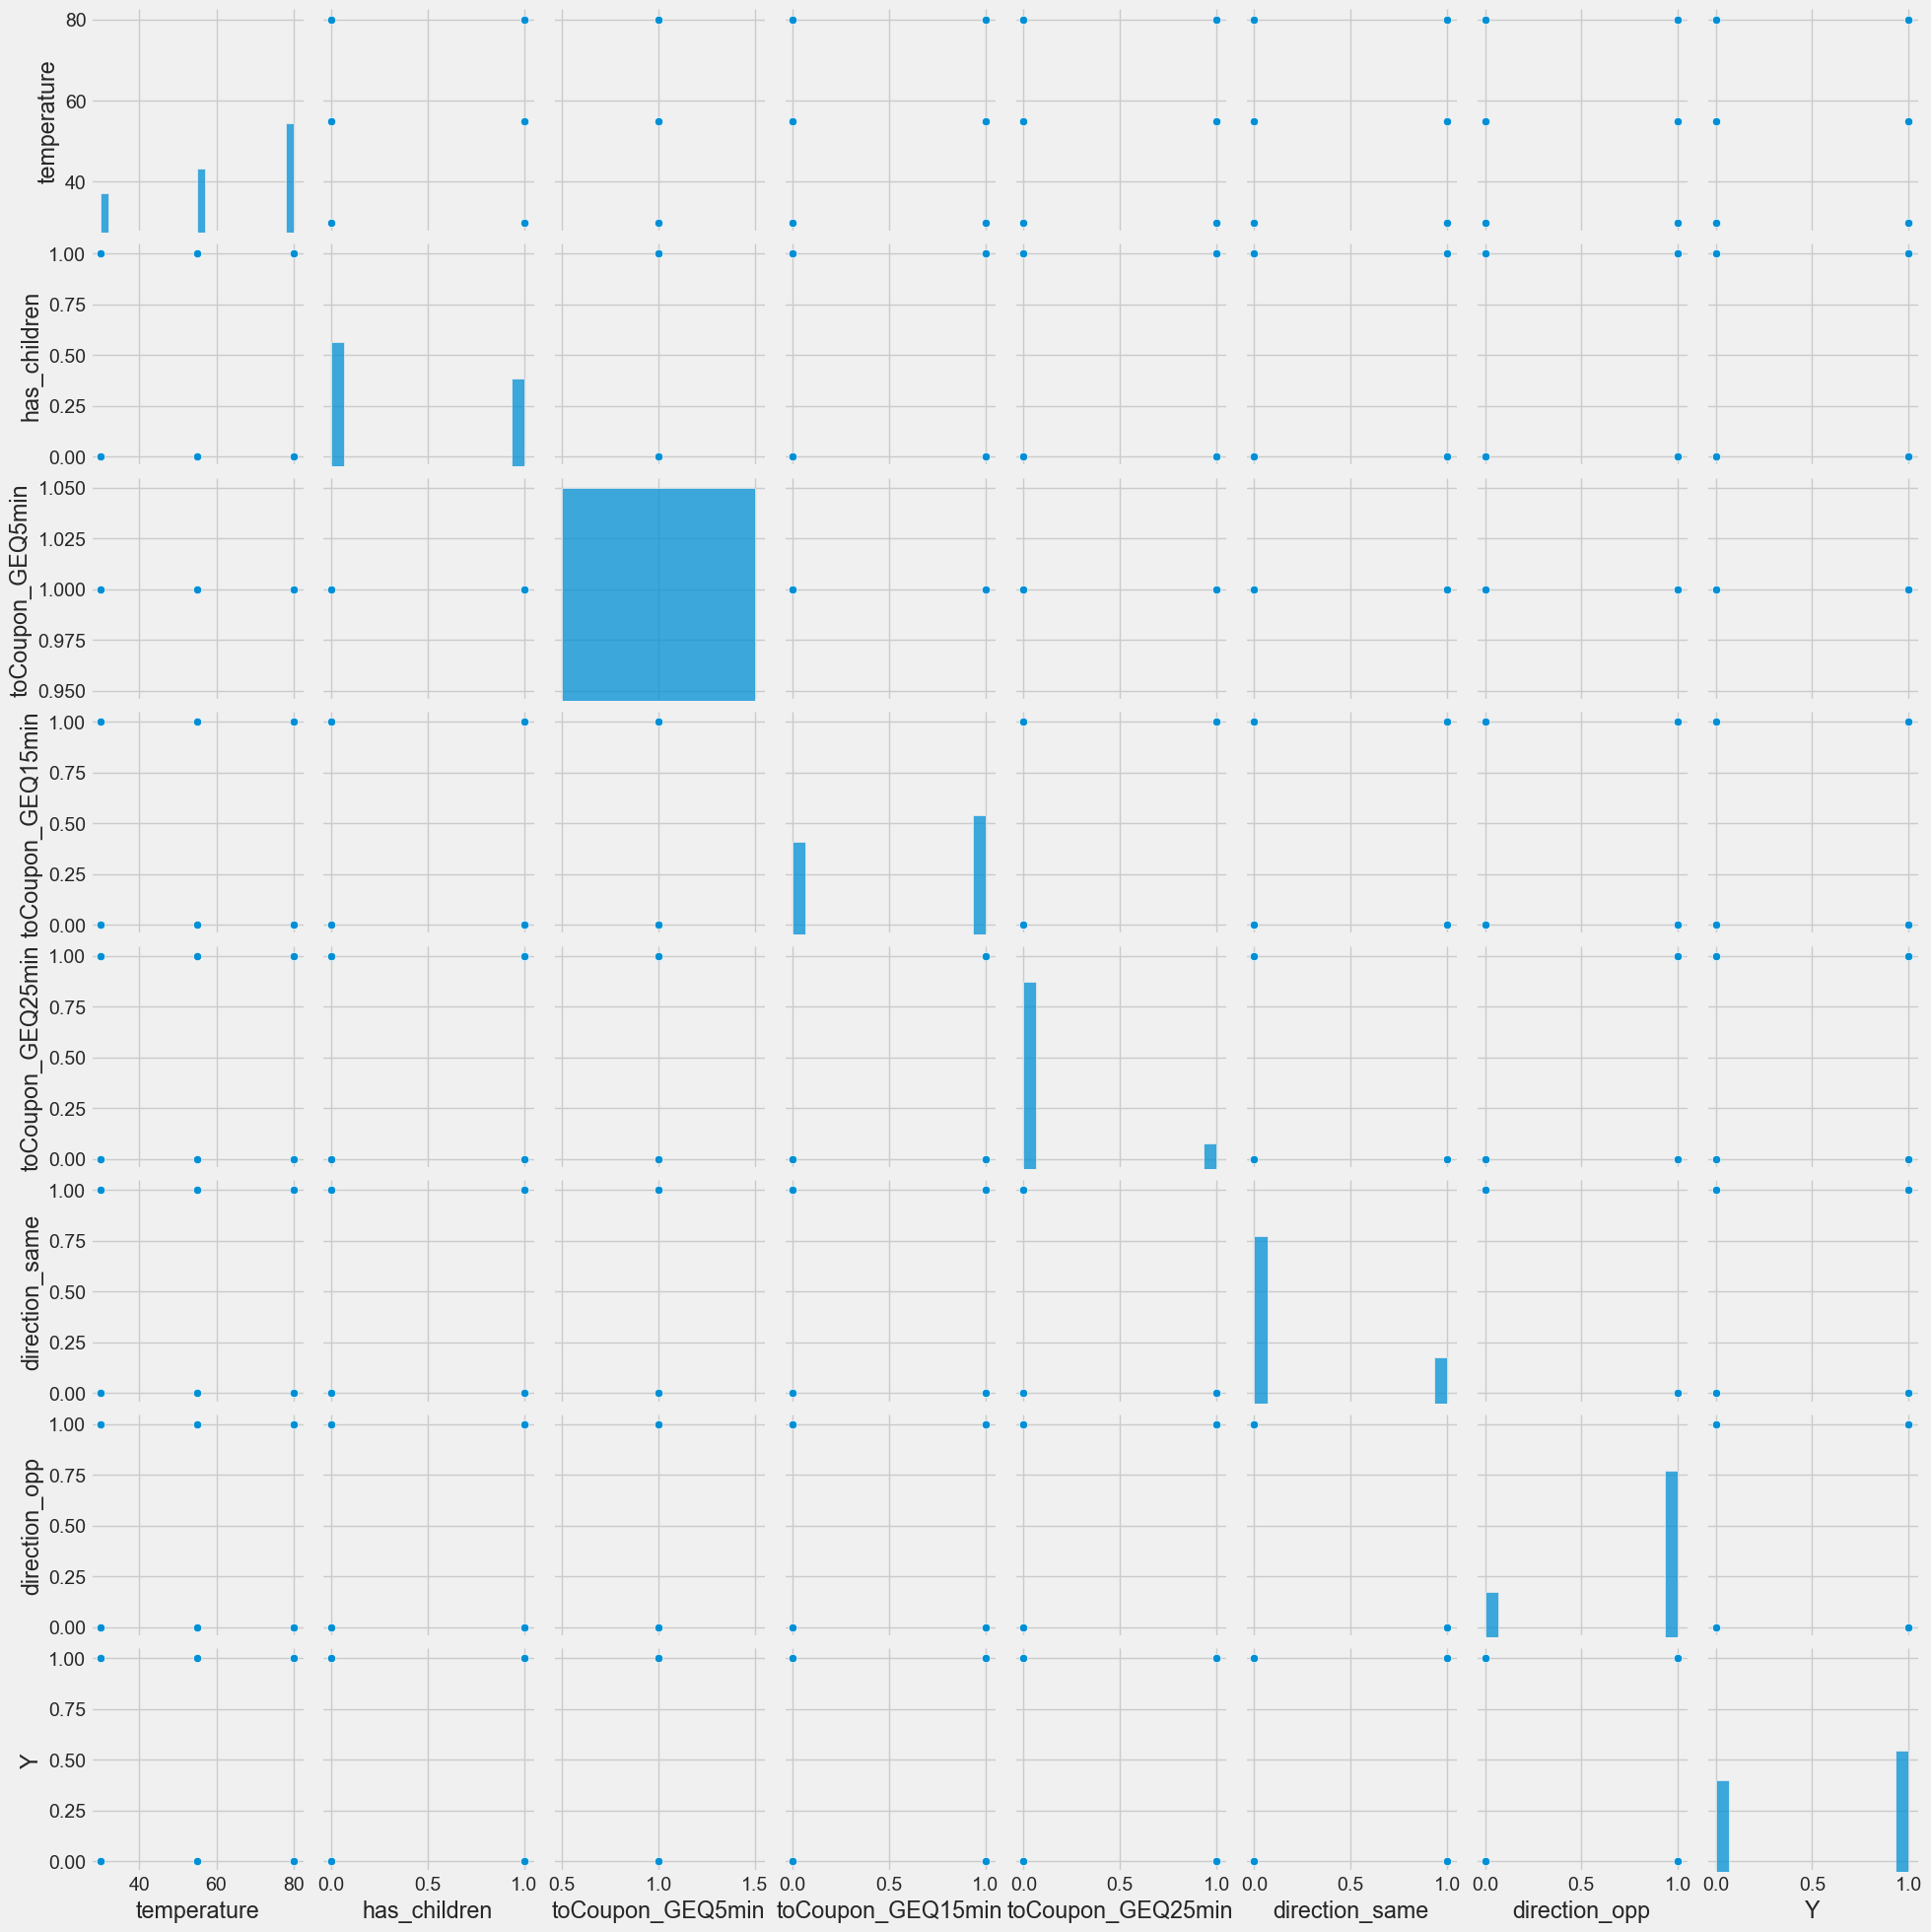

In [27]:
sns.pairplot(df)
plt.show()

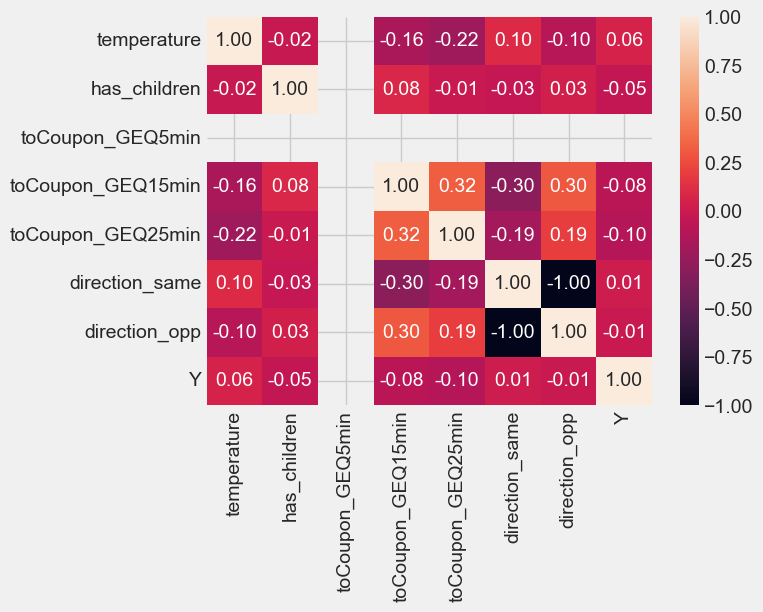

In [28]:
sns.heatmap(df.corr(numeric_only=True), annot = True, fmt="0.2f")
plt.show()

### Preparamos los datos para usar el primer modelo, el cual será: Linear Regression

In [29]:
# Solo usaremos las columnas numericas y de impacto a la hora de comprar o no un cupón
X = df[['temperature', 'has_children', 'direction_opp']]

y = df["Y"]

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    prediction = cross_val_score(model, X, y, cv=10)
    return prediction.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print(f'MAE: {mae:0.2f}')
    print(f'MSE: {mse:0.2f}')
    print(f'RMSE:: {rmse:0.2f}')
    print(f'R2 Square: {r2_square:0.2f}')
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

### Usamos el modelo de Linear regression

In [33]:
from sklearn.linear_model import LinearRegression

lin_regression = LinearRegression()
lin_regression.fit(X_train,y_train)

LinearRegression()

In [34]:
print(lin_regression.intercept_)

0.5691597206578058


In [35]:
# Sacamos los coeficientes de la regresion lineal
coeff_df = pd.DataFrame(lin_regression.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
temperature,0.03
has_children,-0.02
direction_opp,-0.00


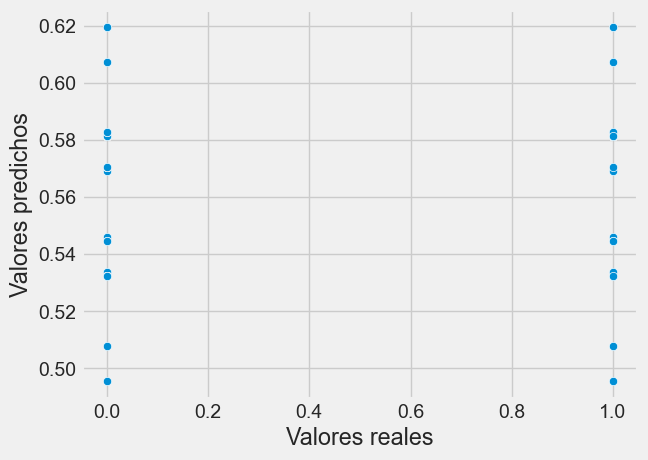

In [36]:
prediction = lin_regression.predict(X_test)

sns.scatterplot(x=y_test, y=prediction)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.show()

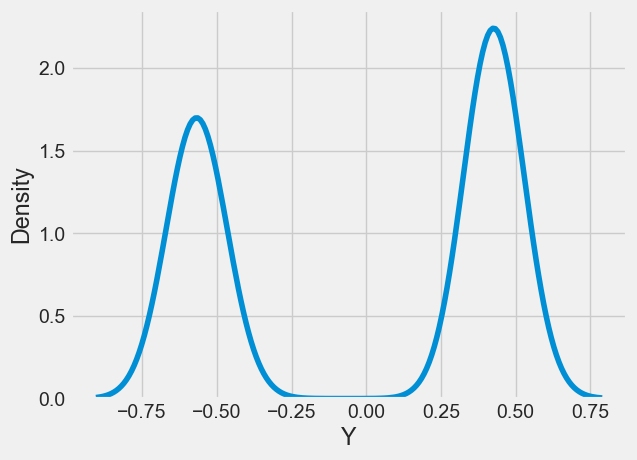

In [37]:
sns.kdeplot(x=y_test-prediction)
plt.show()

In [38]:
test_pred = lin_regression.predict(X_test)
train_pred = lin_regression.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 0.49
MSE: 0.24
RMSE:: 0.49
R2 Square: 0.01
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.49
MSE: 0.24
RMSE:: 0.49
R2 Square: 0.00
__________________________________


### Creamos la curva de aprendizaje

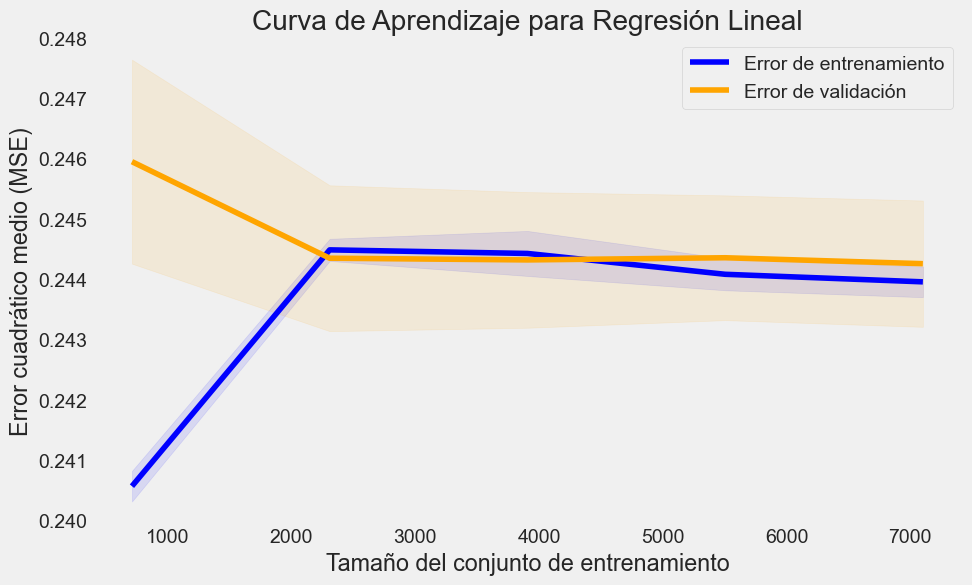

In [39]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Generar la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X_train,  
    y=y_train,
    cv=5,       
    scoring='neg_mean_squared_error',
    n_jobs=-1   
)

# Calcular medias y desviaciones estándar
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Graficar la curva
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Error de entrenamiento", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.plot(train_sizes, test_scores_mean, label="Error de validación", color="orange")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="orange")

plt.title("Curva de Aprendizaje para Regresión Lineal")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Error cuadrático medio (MSE)")
plt.legend(loc="best")
plt.grid()
plt.show()

### Para hacer la comparacion debemos guardar estos resultados en un archivo binario

In [41]:
import joblib

model1 = LinearRegression()
model1.fit(X_train, y_train)

joblib.dump(model1, 'Model1.pk1')

['Model1.pk1']